In [161]:
import pandas as pd
import yfinance as yf

# Download historical stock data
tckr = str(input("Enter your Ticker: "))
tckr = tckr.upper()
df = yf.download(tckr, start='2020-01-01', end='2025-12-31')

# Keep only relevant columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

[*********************100%***********************]  1 of 1 completed


In [162]:
# Predict the next day's closing price
df['Next_High'] = df['High'].shift(-1).fillna(df['Close'])

# Define features and target
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Next_High']

In [163]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


In [165]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build a simple feedforward neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse')

c:\Users\genas\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [166]:
# Early stopping to prevent overfitting
# ReduceLROnPlateau to adapt the learning rate dynamically
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks for early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stop, reduce_lr],verbose=1)

Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 141.1491 - val_loss: 134.2724 - learning_rate: 0.0010
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 63.0486 - val_loss: 17.2047 - learning_rate: 0.0010
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.1729 - val_loss: 12.5322 - learning_rate: 0.0010
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.8454 - val_loss: 7.1750 - learning_rate: 0.0010
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.7567 - val_loss: 4.9964 - learning_rate: 0.0010
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8153 - val_loss: 2.9595 - learning_rate: 0.0010
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3793 - val_loss: 1.6079 - learning_rate: 0.0010
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3674 - val_loss: 0.4290 - learning_rate: 0.0010
Epoch 9/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0780 - val_loss: 0.2279 - learning_rate: 0.0010
Epoch 10/

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# R² compares your model to a baseline model that always predicts the mean.
# If R² is close to 1, your model is capturing most of the trend in the data.
# If R² is 0, your model is no better than guessing the average.
from sklearn.metrics import r2_score

# Predict on test set
y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")  # Target: > 0.75



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
R² Score: 0.9715


In [168]:
y_test

Date
2024-04-30    15.029955
2024-05-01    14.605687
2024-05-02    14.831363
2024-05-03    14.862956
2024-05-06    14.957740
                ...    
2025-05-27    10.600000
2025-05-28    10.520000
2025-05-29    10.505000
2025-05-30    10.380000
2025-06-02    10.150000
Name: Next_High, Length: 273, dtype: float64

In [169]:
y_pred

array([14.952555 , 14.826626 , 14.606987 , 14.730385 , 14.878387 ,
       14.812963 , 14.441002 , 14.410013 , 14.466869 , 14.507255 ,
       14.631269 , 14.80628  , 14.816839 , 14.898597 , 14.787725 ,
       14.725586 , 14.68408  , 14.554893 , 14.632734 , 14.576973 ,
       14.207652 , 14.282382 , 14.353046 , 14.497834 , 14.370885 ,
       14.106238 , 13.9004135, 13.626828 , 13.595577 , 13.466742 ,
       13.751736 , 13.77585  , 13.388944 , 13.442959 , 13.628309 ,
       13.464701 , 13.522163 , 13.482363 , 13.335813 , 13.278376 ,
       13.408064 , 13.733246 , 13.694805 , 13.519377 , 13.417345 ,
       13.394677 , 13.348995 , 13.194805 , 13.231781 , 13.406757 ,
       13.523542 , 13.66825  , 13.889067 , 14.02233  , 13.819977 ,
       13.565838 , 13.805185 , 13.905911 , 13.619981 , 13.442646 ,
       13.742111 , 13.962168 , 14.0728245, 13.980692 , 13.97896  ,
       13.264028 , 12.586973 , 12.737369 , 12.751358 , 12.849102 ,
       12.846755 , 12.850565 , 12.763144 , 12.773427 , 13.1635

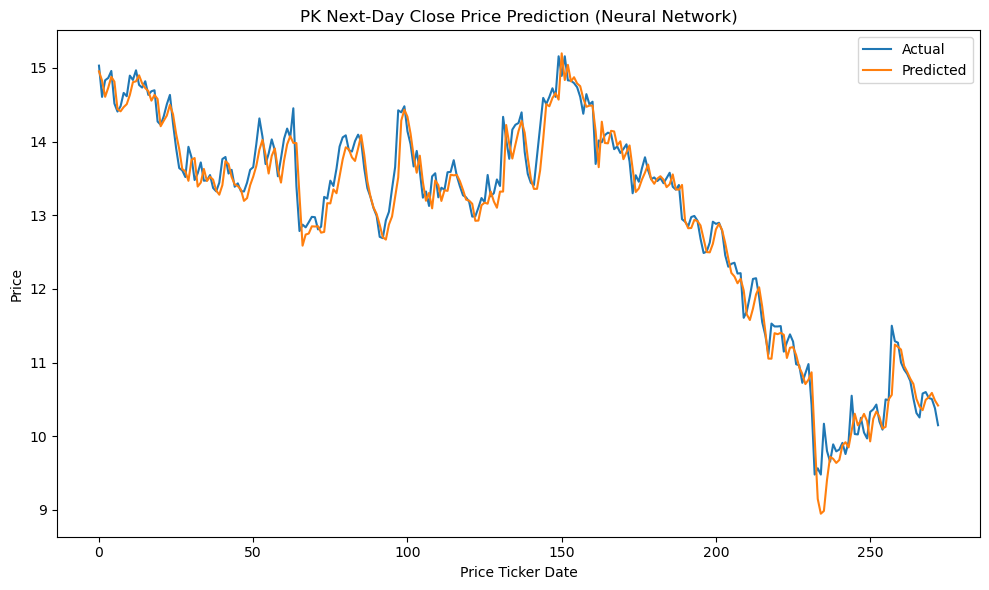

In [170]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test.values, label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted')
plt.title(f'{tckr} Next-Day Close Price Prediction (Neural Network)')
plt.xlabel('Price Ticker Date') #('Test Sample Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

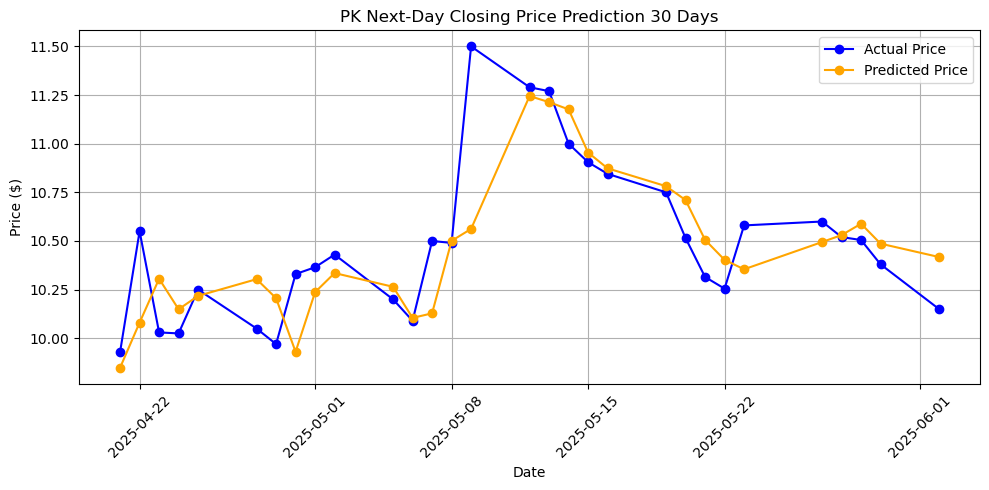

In [171]:
# Extract last 5 days of test predictions and actuals
last_n = 30
y_test_last = y_test[-last_n:]
y_pred_last = y_pred[-last_n:]

# Extract corresponding dates
if isinstance(y_test.index, pd.DatetimeIndex):
    test_dates = y_test.index[-last_n:]
else:
    # fallback if index is not datetime (e.g., RangeIndex)
    test_dates = pd.date_range(end=pd.Timestamp.today(), periods=last_n)

# Plot last week only
plt.figure(figsize=(10, 5))
plt.plot(test_dates, y_test_last.values, label='Actual Price', marker='o', color='blue')
plt.plot(test_dates, y_pred_last, label='Predicted Price', marker='o', color='orange')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(f'{tckr} Next-Day Closing Price Prediction {last_n} Days')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [172]:
df

Price,Open,High,Low,Close,Volume,Next_High
Ticker,PK,PK,PK,PK,PK,
Date,,,,,,
2020-01-02,18.614993,18.614993,18.063915,18.071072,2026400,18.146218
2020-01-03,17.892149,18.146218,17.820581,18.114012,2524300,18.013817
2020-01-06,17.942248,18.013817,17.691758,17.706072,1641900,17.634502
2020-01-07,17.591561,17.634502,17.348228,17.412640,2360600,17.498522
2020-01-08,17.391168,17.498522,17.298129,17.477051,2611400,17.527148
...,...,...,...,...,...,...
2025-05-27,10.370000,10.580000,10.165000,10.560000,6929400,10.600000
2025-05-28,10.600000,10.600000,10.380000,10.380000,6398000,10.520000
